# Exploration of the data collected on Vestiaire Collective

## Setup 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from typing import Optional
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from functions import (
    get_quantiles_by_group, 
    feature_prop_table, 
    target_boxplot
)

In [4]:
sns.set_theme(style="whitegrid")

In [5]:
plt.rcParams["figure.figsize"] = (10, 6)

In [6]:
file_path = "C:/Users/pemma/OneDrive - Université de Tours/Mécen/M2/S1/02 - Machine Learning/05 - Projet/ML_Vestiaire_Collective/backup/vc_data.pkl"

In [7]:
data  = pd.read_pickle(file_path)

In [8]:
data.head()

id                                                url  num_likes  \
0  19126896  https://fr.vestiairecollective.com//women-shoe...          7   
1  19181389  https://fr.vestiairecollective.com//women-clot...          1   
2  19182029  https://fr.vestiairecollective.com//men-clothi...          6   
3  19132670  https://fr.vestiairecollective.com//men-clothi...          3   
4  19118182  https://fr.vestiairecollective.com//women-clot...          9   

    price  we_love_tag online_date gender  category sub_category  \
0  180.00         True  09/11/2021  women     shoes  ankle boots   
1   40.55         True  12/11/2021  women  clothing        jeans   
2  332.50         True  12/11/2021    men  clothing        coats   
3   45.00        False  09/11/2021    men  clothing        jeans   
4  105.00        False  09/11/2021  women  clothing      dresses   

       designer             condition       material  color  \
0  acne studios   very good condition        leather  black   
1  acne studios        good condition  denim - jeans   navy   
2  acne studios        good condition           wool  black   
3  acne studios  never worn, with tag         cotton   grey   
4  acne studios   very good condition          linen  black   

                 size location  
0            [39, eu]    italy  
1            [30, us]   poland  
2  [l, international]  denmark  
3            [28, us]  germany  
4  [s, international]  germany

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10409 entries, 0 to 43
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10409 non-null  int64  
 1   url           10409 non-null  object 
 2   num_likes     10409 non-null  int64  
 3   price         10409 non-null  float64
 4   we_love_tag   10409 non-null  bool   
 5   online_date   10409 non-null  object 
 6   gender        10409 non-null  object 
 7   category      10409 non-null  object 
 8   sub_category  10409 non-null  object 
 9   designer      10409 non-null  object 
 10  condition     10409 non-null  object 
 11  material      10409 non-null  object 
 12  color         10409 non-null  object 
 13  size          10409 non-null  object 
 14  location      10409 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 1.2+ MB


## Description of the `price` target variable 

In [10]:
pd.DataFrame(data.price.describe()).transpose()

count        mean         std   min    25%    50%    75%      max
price  10409.0  410.616666  678.736446  16.0  130.0  250.0  450.0  25000.0

In [10]:
data["lprice"] = np.log(data.price+1)

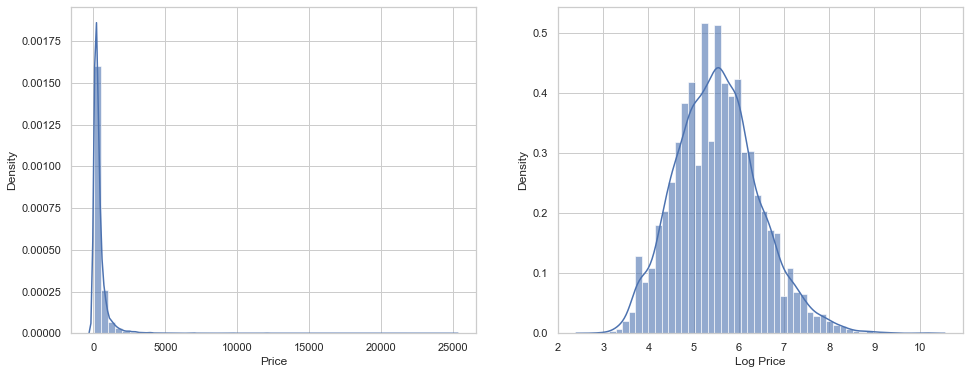

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
sns.distplot(
    data.price, 
    hist_kws=dict(alpha=.6), 
    ax=axes[0]
).set(xlabel="Price")
sns.distplot(
    data.lprice, 
    hist_kws=dict(alpha=.6), 
    ax=axes[1]
).set(xlabel="Log Price"); 

In [13]:
# boundary upper price value
upper_band = data.lprice.mean() + 3*data.lprice.std()

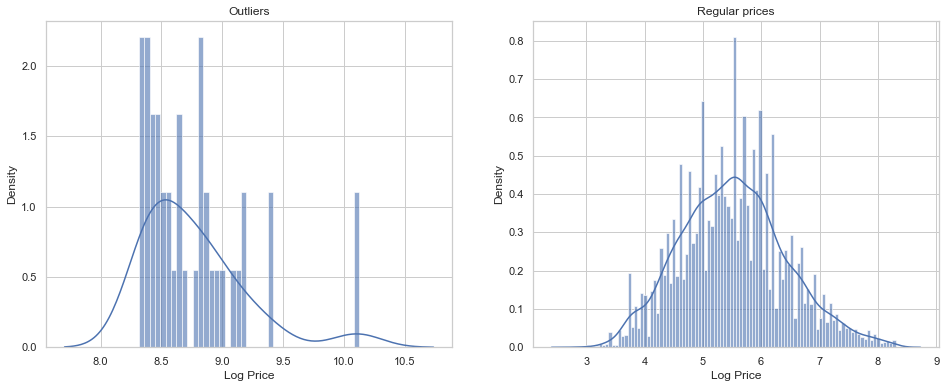

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
sns.distplot(
    data.loc[data.lprice > upper_band, ].lprice, 
    hist_kws=dict(alpha=.6), 
    bins=data.loc[data.lprice > upper_band, ].shape[0], 
    ax=axes[0]
).set(
    xlabel="Log Price", 
    title="Outliers"
)
sns.distplot(
    data.loc[data.lprice <= upper_band, ].lprice, 
    hist_kws=dict(alpha=.6), 
    bins=100, 
    ax=axes[1]
).set(
    xlabel="Log Price", 
    title="Regular prices"
); 

## Multivariate statistics

Visualize relationships between `price` and the other features.

### Features

In [15]:
features = pd.DataFrame(data.columns).transpose()
features.index = ["features"]
features

0    1          2      3            4            5       6   \
features  id  url  num_likes  price  we_love_tag  online_date  gender   

                7             8         9          10        11     12    13  \
features  category  sub_category  designer  condition  material  color  size   

                14      15  
features  location  lprice

### `we_love_tag`

In [16]:
fig = px.histogram(
    data,
    x="lprice", 
    color="we_love_tag", 
    barmode="overlay"
)
fig.show()

In [17]:
feature_prop_table(feature="we_love_tag", data=data)

we_love_tag  count      freq  cumul_freq
0        False   6339  0.608992    0.608992
1         True   4070  0.391008    1.000000

In [18]:
get_quantiles_by_group(feature="we_love_tag", data=data)

lprice                    
                q0.25    median     q0.75
we_love_tag                              
False        4.948760  5.532440  6.159180
True         4.820282  5.411199  6.005737

### `condition`

In [19]:
target_boxplot(feature="condition", data=data)

In [20]:
feature_prop_table(feature="condition", data=data)

condition  count      freq  cumul_freq
0   very good condition   4811  0.462196    0.462196
1            never worn   3395  0.326160    0.788356
2        good condition   1197  0.114997    0.903353
3  never worn, with tag    821  0.078874    0.982227
4        fair condition    185  0.017773    1.000000

In [21]:
get_quantiles_by_group(feature="condition", data=data) 

lprice                    
                         q0.25    median     q0.75
condition                                         
never worn            5.081404  5.707110  6.294601
never worn, with tag  4.947340  5.525453  6.087479
very good condition   4.859812  5.438079  5.993961
good condition        4.663439  5.246076  5.860786
fair condition        4.290459  4.753590  5.421950

### `gender`

In [22]:
target_boxplot(feature="gender", data=data)

In [23]:
feature_prop_table(feature="gender", data=data) 

gender  count      freq  cumul_freq
0          women   8266  0.794120    0.794120
1            men   2001  0.192237    0.986358
2           kids    133  0.012777    0.999135
3  life & living      9  0.000865    1.000000

In [24]:
get_quantiles_by_group(feature="gender", data=data) 

lprice                    
                  q0.25    median     q0.75
gender                                     
life & living  4.976734  5.993961  6.685861
men            5.017280  5.579730  6.090337
women          4.875197  5.521461  6.111467
kids           4.234107  4.738739  5.017280

### `category`

In [25]:
target_boxplot(feature="category", data=data)

In [26]:
feature_prop_table(feature="category", data=data) 

category  count      freq  cumul_freq
0                shoes   3351  0.321933    0.321933
1             clothing   3214  0.308771    0.630704
2                 bags   2265  0.217600    0.848304
3          accessories   1116  0.107215    0.955519
4            jewellery    352  0.033817    0.989336
5                girls     56  0.005380    0.994716
6                 boys     46  0.004419    0.999135
7  design & decoration      8  0.000769    0.999904
8      sport & leisure      1  0.000096    1.000000

### `sub_category`

In [27]:
category = "accessories"

In [28]:
target_boxplot(
    feature="sub_category", 
    data=data.loc[data.category==category] ,
    title=category
)

In [29]:
feature_prop_table(
    feature="sub_category", 
    data=data.loc[data.category==category]
)

sub_category  count      freq  cumul_freq
0                      belts    202  0.181004    0.181004
1                    scarves    189  0.169355    0.350358
2                 sunglasses    168  0.150538    0.500896
3                    wallets    151  0.135305    0.636201
4    purses, wallets & cases     92  0.082437    0.718638
5                       hats     82  0.073477    0.792115
6                    watches     44  0.039427    0.831541
7          silk handkerchief     41  0.036738    0.868280
8                       ties     39  0.034946    0.903226
9        hats & pull on hats     33  0.029570    0.932796
10  scarves & pocket squares     29  0.025986    0.958781
11                 jewellery     25  0.022401    0.981183
12                    gloves     15  0.013441    0.994624
13                 cufflinks      5  0.004480    0.999104
14       bags & pencil cases      1  0.000896    1.000000

In [30]:
get_quantiles_by_group(
    feature="sub_category", 
    data=data.loc[data.category==category]
)

lprice                    
                             q0.25    median     q0.75
sub_category                                          
watches                   4.569045  5.525453  6.685861
gloves                    4.386290  5.225747  5.599388
belts                     4.641907  5.198497  5.638355
wallets                   4.505335  5.198497  5.860786
jewellery                 4.795791  5.141664  5.545177
hats                      4.863659  5.135798  5.484797
scarves                   4.615121  5.049856  5.505332
silk handkerchief         4.682131  5.017280  5.480639
sunglasses                4.510860  4.997121  5.305053
hats & pull on hats       4.615121  4.981961  5.247024
bags & pencil cases       4.912655  4.912655  4.912655
scarves & pocket squares  4.454347  4.836282  5.198497
purses, wallets & cases   4.189655  4.746165  5.557936
cufflinks                 4.189655  4.531416  4.948760
ties                      3.900184  4.262680  4.510860

### `designer`

In [31]:
target_boxplot(
    feature="designer", 
    data=data
 )

In [32]:
feature_prop_table(
    feature="designer", 
    data=data 
)

designer  count      freq  cumul_freq
0       jean paul gaultier    322  0.030935    0.030935
1                    chloé    320  0.030743    0.061677
2          dolce & gabbana    316  0.030358    0.092036
3                  versace    316  0.030358    0.122394
4               kate spade    315  0.030262    0.152656
5                    coach    315  0.030262    0.182919
6      salvatore ferragamo    315  0.030262    0.213181
7                    fendi    313  0.030070    0.243251
8                  balmain    313  0.030070    0.273321
9               tory burch    313  0.030070    0.303391
10      yves saint laurent    312  0.029974    0.333365
11                burberry    311  0.029878    0.363243
12           isabel marant    310  0.029782    0.393025
13            acne studios    310  0.029782    0.422807
14          bottega veneta    310  0.029782    0.452589
15       alexander mcqueen    309  0.029686    0.482275
16                 moncler    308  0.029590    0.511865
17               off-white    307  0.029494    0.541358
18     christian louboutin    307  0.029494    0.570852
19              jimmy choo    306  0.029398    0.600250
20           saint laurent    306  0.029398    0.629647
21                givenchy    305  0.029302    0.658949
22                   gucci    305  0.029302    0.688251
23                   prada    305  0.029302    0.717552
24              balenciaga    304  0.029205    0.746758
25          alexander wang    304  0.029205    0.775963
26  maison martin margiela    304  0.029205    0.805169
27      valentino garavani    302  0.029013    0.834182
28            michael kors    301  0.028917    0.863099
29                    dior    297  0.028533    0.891632
30           louis vuitton    295  0.028341    0.919973
31            golden goose    278  0.026708    0.946681
32                  chanel    255  0.024498    0.971179
33                  hermès    253  0.024306    0.995485
34                  celine     46  0.004419    0.999904
35                   démoo      1  0.000096    1.000000

In [33]:
lprice_by_designer = get_quantiles_by_group(
    feature="designer", 
    data=data 
)
lprice_by_designer

lprice                    
                           q0.25    median     q0.75
designer                                            
chanel                  5.993961  6.697034  7.785367
démoo                   6.552508  6.552508  6.552508
louis vuitton           5.763117  6.293419  6.851280
hermès                  5.484797  6.111467  6.856462
balenciaga              5.526945  6.054991  6.391463
bottega veneta          5.303305  5.993961  6.626650
saint laurent           5.490398  5.993961  6.792344
christian louboutin     5.597392  5.919807  6.175867
dior                    5.081404  5.888878  6.803505
balmain                 5.198497  5.837730  6.455199
celine                  5.260383  5.807789  6.382128
moncler                 5.077922  5.707110  6.266239
valentino garavani      5.334793  5.707110  6.216606
fendi                   5.135798  5.707110  6.216606
chloé                   5.198497  5.681841  6.238115
givenchy                5.081404  5.669881  6.216606
gucci                   5.225747  5.649784  6.196444
maison martin margiela  5.017280  5.620401  6.111467
alexander mcqueen       5.096079  5.525453  5.968708
jimmy choo              5.066789  5.495064  5.845332
off-white               5.017280  5.465483  5.936559
burberry                4.890236  5.455321  5.993961
prada                   4.795791  5.442418  6.111467
golden goose            4.952281  5.420535  5.742872
isabel marant           4.875197  5.420535  5.765176
versace                 4.912655  5.323917  5.862207
jean paul gaultier      4.760698  5.303305  5.948682
dolce & gabbana         4.615121  5.303305  6.152106
salvatore ferragamo     4.727565  5.081404  5.636572
yves saint laurent      4.709530  5.073106  5.703782
alexander wang          4.510860  5.024209  5.544188
acne studios            4.663439  5.017280  5.602119
coach                   4.400584  4.875197  5.303305
michael kors            4.330733  4.709530  5.075174
tory burch              4.262680  4.615121  5.111988
kate spade              3.737670  4.143135  4.677393

### `material`

In [34]:
target_boxplot(
    feature="material", 
    data=data
 )

In [35]:
feature_prop_table(
    feature="material", 
    data=data 
)

material  count      freq  cumul_freq
0               leather   4140  0.397733    0.397733
1                cotton   1134  0.108944    0.506677
2                  wool    764  0.073398    0.580075
3                 cloth    656  0.063022    0.643097
4             polyester    473  0.045441    0.688539
5             synthetic    395  0.037948    0.726487
6                  silk    384  0.036891    0.763378
7                 suede    378  0.036315    0.799693
8        patent leather    311  0.029878    0.829571
9                 metal    208  0.019983    0.849553
10                other    201  0.019310    0.868863
11              viscose    162  0.015563    0.884427
12              plastic    149  0.014315    0.898741
13             cashmere    105  0.010087    0.908829
14        denim - jeans    105  0.010087    0.918916
15               velvet     94  0.009031    0.927947
16              glitter     91  0.008742    0.936689
17                  fur     82  0.007878    0.944567
18               rubber     73  0.007013    0.951580
19      exotic leathers     72  0.006917    0.958497
20   cotton - elasthane     63  0.006052    0.964550
21  pony-style calfskin     52  0.004996    0.969546
22                tweed     46  0.004419    0.973965
23                linen     41  0.003939    0.977904
24               silver     41  0.003939    0.981843
25          gold plated     40  0.003843    0.985685
26                steel     38  0.003651    0.989336
27        vegan leather     31  0.002978    0.992314
28             faux fur     14  0.001345    0.993659
29       gold and steel      8  0.000769    0.994428
30                lycra      7  0.000672    0.995100
31               pearls      6  0.000576    0.995677
32          yellow gold      5  0.000480    0.996157
33                 lace      5  0.000480    0.996638
34               wicker      5  0.000480    0.997118
35              crystal      4  0.000384    0.997502
36               sponge      3  0.000288    0.997790
37            pink gold      3  0.000288    0.998079
38              spandex      3  0.000288    0.998367
39                 wood      3  0.000288    0.998655
40                chain      2  0.000192    0.998847
41           white gold      2  0.000192    0.999039
42                 gold      2  0.000192    0.999231
43            polyamide      2  0.000192    0.999424
44                pearl      1  0.000096    0.999520
45        silver plated      1  0.000096    0.999616
46            alligator      1  0.000096    0.999712
47            crocodile      1  0.000096    0.999808
48              ceramic      1  0.000096    0.999904
49                glass      1  0.000096    1.000000

In [36]:
get_quantiles_by_group(
    feature="material", 
    data=data 
)

lprice                    
                        q0.25    median     q0.75
material                                         
alligator            8.662795  8.662795  8.662795
pink gold            6.557388  8.318986  8.447318
crocodile            7.932003  7.932003  7.932003
white gold           7.276043  7.461176  7.646309
sponge               5.269173  6.685861  6.797308
pearls               6.287355  6.485434  6.770073
tweed                5.764473  6.466854  6.884836
yellow gold          5.111988  6.196444  6.908755
wicker               5.968708  6.133398  6.221087
cloth                5.245642  5.843196  6.292622
pearl                5.798759  5.798759  5.798759
rubber               5.147494  5.771441  6.223588
fur                  5.211941  5.707110  6.729881
exotic leathers      4.793716  5.672732  6.685861
leather              5.049856  5.671982  6.221087
spandex              5.518259  5.638355  5.907111
glitter              5.017280  5.537334  5.968708
patent leather       5.017280  5.532440  5.992713
suede                5.017280  5.525453  5.993961
polyester            4.912655  5.484797  5.993961
velvet               5.017280  5.465946  6.202250
cashmere             5.017280  5.454765  6.111467
denim - jeans        4.795791  5.442418  6.087479
other                4.718499  5.442418  5.973810
lace                 5.015954  5.420535  5.525453
crystal              4.879193  5.399494  6.062098
synthetic            4.394449  5.398163  6.111467
viscose              4.609384  5.365878  6.051488
wool                 4.843951  5.303305  5.993961
silver               4.980176  5.303305  5.860786
wood                 5.277789  5.303305  5.542024
faux fur             5.062584  5.256383  5.882210
pony-style calfskin  5.015619  5.249649  5.821303
cotton - elasthane   4.454347  5.198497  5.705446
linen                4.823181  5.198497  5.993961
ceramic              5.198497  5.198497  5.198497
metal                4.615121  5.190140  5.677582
cotton               4.605170  5.170484  5.754792
gold and steel       4.341849  5.111358  5.394310
silk                 4.510860  5.017280  5.692043
lycra                4.584759  4.962845  5.702531
polyamide            4.265573  4.947627  5.629681
gold plated          4.464034  4.893926  5.329272
silver plated        4.843242  4.843242  4.843242
plastic              4.394449  4.812184  5.398163
steel                4.330733  4.752660  5.469916
gold                 4.214129  4.599616  4.985104
vegan leather        4.314278  4.564348  4.795791
chain                3.917941  4.479334  5.040726
glass                3.433987  3.433987  3.433987

### `color`

In [37]:
target_boxplot(
    feature="color", 
    data=data
 )

In [38]:
feature_prop_table(
    feature="color",
    data=data  
)

color  count      freq  cumul_freq
0           black   3447  0.331156    0.331156
1           white    915  0.087905    0.419060
2     multicolour    803  0.077145    0.496205
3           brown    736  0.070708    0.566913
4           beige    702  0.067442    0.634355
5            blue    676  0.064944    0.699299
6            pink    415  0.039869    0.739168
7            grey    375  0.036027    0.775195
8             red    312  0.029974    0.805169
9            gold    308  0.029590    0.834758
10          green    307  0.029494    0.864252
11           navy    203  0.019502    0.883754
12          camel    197  0.018926    0.902680
13         silver    176  0.016908    0.919589
14       burgundy    158  0.015179    0.934768
15         orange    110  0.010568    0.945336
16         purple    100  0.009607    0.954943
17         yellow    100  0.009607    0.964550
18           ecru     84  0.008070    0.972620
19          khaki     80  0.007686    0.980306
20          other     68  0.006533    0.986838
21     anthracite     57  0.005476    0.992314
22       metallic     55  0.005284    0.997598
23      turquoise     24  0.002306    0.999904
24  white / black      1  0.000096    1.000000

In [39]:
get_quantiles_by_group(
    feature="color", 
    data=data
)

lprice                    
                  q0.25    median     q0.75
color                                      
white / black  5.723585  5.723585  5.723585
brown          5.017280  5.673323  6.311735
black          5.017280  5.602119  6.216606
anthracite     4.779123  5.564520  6.342121
white          5.017280  5.564520  5.993961
beige          5.017280  5.534887  6.111467
green          4.820151  5.533389  6.216606
red            4.930098  5.525453  6.223588
camel          4.843242  5.525453  6.330006
turquoise      4.991124  5.509093  5.993961
silver         4.795791  5.486566  5.929589
burgundy       4.943309  5.442418  6.030465
multicolour    4.753590  5.398163  5.894100
navy           4.794052  5.398163  6.223588
ecru           4.815054  5.393462  5.900798
other          4.871351  5.370248  5.872071
khaki          4.757638  5.353887  6.245624
pink           4.795791  5.303305  5.987700
purple         4.617813  5.303305  5.987424
orange         4.620023  5.288216  6.111467
blue           4.605170  5.249649  5.993961
grey           4.753590  5.227788  5.873445
gold           4.510860  5.176134  5.780224
metallic       4.795791  5.111988  5.707110
yellow         4.615121  5.075174  5.719268

### `size`

In [54]:
data["size"] = data["size"].apply(lambda size: "".join(size))

In [55]:
target_boxplot(
    feature="size", 
    data=data
 )

In [56]:
prop_table = feature_prop_table(feature="size", data=data)
prop_table = prop_table.loc[prop_table.cumul_freq <= .9]
prop_table

size  count      freq  cumul_freq
0            no size   3389  0.325584    0.325584
1     minternational    456  0.043808    0.369392
2     sinternational    372  0.035738    0.405130
3               38eu    364  0.034970    0.440100
4               39eu    355  0.034105    0.474205
5               37eu    354  0.034009    0.508214
6               40eu    275  0.026419    0.534633
7               38fr    271  0.026035    0.560669
8               36fr    232  0.022288    0.582957
9     linternational    221  0.021232    0.604189
10              36eu    209  0.020079    0.624267
11              41eu    193  0.018542    0.642809
12              40fr    155  0.014891    0.657700
13              42it    149  0.014315    0.672015
14            37.5eu    149  0.014315    0.686329
15              40it    148  0.014218    0.700548
16   xsinternational    143  0.013738    0.714286
17            38.5eu    131  0.012585    0.726871
18              42eu    124  0.011913    0.738784
19              38it    108  0.010376    0.749159
20   xlinternational    106  0.010183    0.759343
21            39.5eu     95  0.009127    0.768470
22              34fr     93  0.008935    0.777404
23              43eu     90  0.008646    0.786051
24              44it     90  0.008646    0.794697
25            36.5eu     84  0.008070    0.802767
26              44eu     74  0.007109    0.809876
27              46it     70  0.006725    0.816601
28              42fr     67  0.006437    0.823038
29              48it     66  0.006341    0.829378
30              35eu     62  0.005956    0.835335
31              39it     53  0.005092    0.840427
32              37it     52  0.004996    0.845422
33            40.5eu     51  0.004900    0.850322
34              50it     45  0.004323    0.854645
35              36it     41  0.003939    0.858584
36              90cm     40  0.003843    0.862427
37              44fr     38  0.003651    0.866077
38              45eu     34  0.003266    0.869344
39               8us     30  0.002882    0.872226
40              20-5     29  0.002786    0.875012
41              52it     28  0.002690    0.877702
42            41.5eu     27  0.002594    0.880296
43            42.5eu     27  0.002594    0.882890
44               8uk     27  0.002594    0.885484
45            35.5eu     27  0.002594    0.888078
46              10-5     26  0.002498    0.890575
47  xxlinternational     25  0.002402    0.892977
48              95cm     25  0.002402    0.895379
49               6uk     25  0.002402    0.897781

In [57]:
quantile_table = get_quantiles_by_group(feature="size", data=data)
quantile_table[quantile_table.index.isin(prop_table["size"])]

lprice                    
                     q0.25    median     q0.75
size                                          
6uk               6.000944  6.223588  6.976311
52it              5.357285  5.993961  6.521127
44eu              5.535220  5.874836  6.221842
20-5              5.093750  5.860786  6.311735
48it              5.017859  5.846151  6.461426
45eu              5.555653  5.785438  5.977893
40.5eu            5.438070  5.754792  6.044995
10-5              5.293305  5.754157  6.250415
37it              5.351858  5.707110  6.084796
37.5eu            5.198497  5.707110  6.000944
36it              5.303305  5.707110  5.993961
50it              4.976734  5.707110  6.552508
42eu              5.192910  5.681841  6.054138
34fr              5.017280  5.666427  6.478510
42.5eu            5.222287  5.655992  6.006277
8uk               4.903048  5.649784  6.023339
41.5eu            5.212122  5.638355  5.962272
40eu              5.198497  5.634790  5.995890
36fr              5.017280  5.611260  6.311735
39eu              5.017280  5.602119  6.076794
46it              5.017280  5.602119  6.383394
41eu              5.198497  5.602119  6.100319
37eu              5.135764  5.600703  5.993961
38it              4.948760  5.595945  6.216606
43eu              4.884562  5.585398  6.111467
40fr              4.976734  5.583496  6.680697
38.5eu            5.181025  5.564520  6.000157
35eu              5.057743  5.557968  6.005100
44it              4.851231  5.548955  6.033563
38eu              5.022477  5.546561  5.993961
no size           4.836282  5.545177  6.395262
39.5eu            5.098756  5.532440  6.095822
35.5eu            5.017280  5.527443  5.864848
36.5eu            4.816333  5.525453  6.000119
36eu              5.225747  5.525453  5.942799
42it              4.927254  5.420535  6.054439
40it              4.912655  5.418318  6.071842
39it              4.770685  5.398163  5.942799
44fr              4.921681  5.386721  6.021504
42fr              4.930707  5.358848  6.136431
sinternational    4.792313  5.298317  5.836366
linternational    4.792313  5.265743  5.828946
xlinternational   4.615121  5.232581  5.755358
minternational    4.722923  5.198525  5.860786
90cm              4.919655  5.198497  5.638355
xsinternational   4.624925  5.198497  5.707110
38fr              3.737670  5.081404  5.914593
95cm              4.510860  5.017280  5.484797
xxlinternational  4.564348  4.875197  5.793867
8us               4.214133  4.757573  5.043444

### `location`

In [ ]:
target_boxplot(
    feature="location", 
    data=data
 )

In [ ]:
feature_prop_table(feature="location", data=data)

location  count      freq  cumul_freq
0                         italy   3007  0.288885    0.288885
1                        france   2037  0.195696    0.484581
2                united kingdom   1410  0.135460    0.620040
3                       germany   1050  0.100874    0.720915
4                         spain    521  0.050053    0.770967
5                       romania    311  0.029878    0.800845
6                        poland    207  0.019887    0.820732
7                        greece    200  0.019214    0.839946
8                       belgium    192  0.018446    0.858392
9                   netherlands    180  0.017293    0.875685
10                      austria    154  0.014795    0.890479
11                       sweden    138  0.013258    0.903737
12                     bulgaria    125  0.012009    0.915746
13  vestiaire collective france    112  0.010760    0.926506
14                     portugal    108  0.010376    0.936882
15                      denmark     81  0.007782    0.944663
16                      ireland     71  0.006821    0.951484
17                    lithuania     70  0.006725    0.958209
18                       latvia     64  0.006149    0.964358
19                      croatia     55  0.005284    0.969642
20                       cyprus     55  0.005284    0.974926
21                      hungary     41  0.003939    0.978864
22                      finland     39  0.003747    0.982611
23                      estonia     34  0.003266    0.985878
24                     slovakia     30  0.002882    0.988760
25               czech republic     27  0.002594    0.991354
26                   luxembourg     26  0.002498    0.993851
27                     slovenia     24  0.002306    0.996157
28                       monaco     14  0.001345    0.997502
29                united states      8  0.000769    0.998271
30                  switzerland      5  0.000480    0.998751
31                        malta      4  0.000384    0.999135
32                       jersey      3  0.000288    0.999424
33                       canada      1  0.000096    0.999520
34                       israel      1  0.000096    0.999616
35                  isle of man      1  0.000096    0.999712
36                    singapore      1  0.000096    0.999808
37           the canary islands      1  0.000096    0.999904
38                      andorra      1  0.000096    1.000000

In [ ]:
get_quantiles_by_group(feature="location", data=data )

lprice                    
                                q0.25    median     q0.75
location                                                 
isle of man                  7.313887  7.313887  7.313887
united states                6.423147  7.022047  7.783307
andorra                      6.685861  6.685861  6.685861
jersey                       6.277154  6.395128  6.511763
canada                       6.365043  6.365043  6.365043
malta                        5.570969  5.974599  6.457625
israel                       5.906669  5.906669  5.906669
denmark                      4.947340  5.831090  6.552508
latvia                       5.172310  5.752250  6.077448
belgium                      5.090664  5.729474  6.351730
netherlands                  5.046504  5.710992  6.206576
croatia                      5.027116  5.707110  6.215607
vestiaire collective france  5.191494  5.681841  6.291034
czech republic               5.139951  5.652489  6.226488
austria                      5.017280  5.602119  6.311735
lithuania                    4.691348  5.583320  6.306693
france                       5.017280  5.564520  6.165418
monaco                       4.971577  5.563786  6.020871
estonia                      4.795791  5.548575  6.348774
bulgaria                     4.948760  5.545177  6.196444
united kingdom               4.937850  5.532440  6.211042
luxembourg                   5.362300  5.528294  5.981171
singapore                    5.527443  5.527443  5.527443
romania                      4.948760  5.525453  6.111467
cyprus                       4.958301  5.525453  6.051605
italy                        4.875197  5.525453  6.077642
the canary islands           5.525453  5.525453  5.525453
greece                       4.859444  5.523457  5.942799
sweden                       4.865687  5.468271  6.192766
slovakia                     4.983607  5.463607  6.196444
spain                        4.709530  5.303305  5.916202
finland                      4.639280  5.303305  6.148838
germany                      4.615121  5.278115  5.941414
portugal                     4.496731  5.250901  5.877987
ireland                      4.442582  5.198497  5.899443
slovenia                     4.589055  5.134777  5.594589
poland                       4.524661  5.095038  5.748517
hungary                      4.215382  5.049856  5.726848
switzerland                  3.970669  4.146621  5.352332

### `num_likes`

In [ ]:
corr = round( np.corrcoef(x=data.num_likes, y=data.lprice)[0][1], 3 )
fig = px.scatter(
    data,
    x="num_likes",
    y="lprice",
    trendline="ols", 
    title=f"Items log price depending on number of likes received: {corr=}"
)
fig.show()

In [11]:
corr = round( np.corrcoef(x=data.num_likes, y=data.price)[0][1], 3 )
fig = px.scatter(
    data,
    x="num_likes",
    y="price",
    trendline="ols", 
    title=f"Items price depending on number of likes received: {corr=}"
)
fig.show()